<a href="https://colab.research.google.com/github/v0001/UNIST-assignment/blob/master/2020_2)%20%ED%86%B5%EA%B3%84%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/Assignment1/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Programming
### Fall 2020
### Homework 1 (Due Sep 18)

In [ ]:
import numpy as np                # numpy로 다양한 수식을 사용
import pandas as pd               # pandas lib 사용
import matplotlib.pyplot as plt   # 그래프 
import pandas.util.testing as tm
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

# _1. Reproduce the Figure 2.1 with your convenient statistical software. Provide your code and its output. 


- histogram( x = grf, y = frequency) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gfr = pd.read_table('/content/drive/My Drive/★UNIST/2020 2학기/Statistical Programming/Assignment 1/gfr.txt', names = ['Value'])

In [ ]:
gfr.head()

,Value
0,108
1,91
2,62
3,59
4,84


In [ ]:
mean = gfr['Value'].mean()

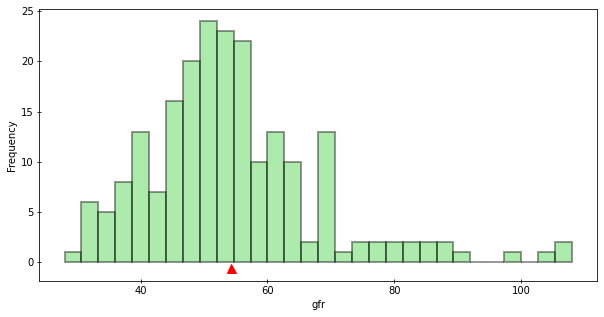

In [ ]:
plt.figure(figsize=(10,5))
ax_hist =sns.distplot(gfr, bins = 30, color = 'limegreen', kde = False, hist_kws=dict(edgecolor="k", linewidth=2)) 

plt.xticks([20,40,60,80,100])
plt.yticks([0,5,10,15,20,25,30])

plt.tick_params(axis='x', direction='inout', top=False, bottom = True )
plt.tick_params(axis='y', direction='inout', left=True )

ax_hist.plot([mean], [-0.6], marker='^', markersize=9, color="red")

ax_hist.set_xlabel("gfr", size=10)
ax_hist.set_ylabel("Frequency", size=10)

plt.show()

# _2. Reproduce the Table 2.1 with your convenient statistical software. Provide your code and its output. 

- Table (Estimate/Standard Error by mean, 25% Winsorised/median)

In [ ]:
gfr.describe()

,Value
count,211.000000
mean,54.265403
std,13.720880
min,28.000000
25%,46.000000
50%,52.000000
75%,60.000000
max,108.000000


## mean

In [ ]:
est_mean = gfr.mean()

In [ ]:
gfr_size = len(gfr)      # gfr에 있는 데이터 갯수
se_mean = np.sqrt(((gfr - est_mean)**2).sum() / (gfr_size * (gfr_size - 1)))
se_mean_1 = np.sqrt(np.var(gfr, ddof = 1)/gfr_size)

In [ ]:
mean, se_mean, se_mean_1

(54.2654028436019, Value    0.944584
 dtype: float64, Value    0.944584
 dtype: float64)

In [ ]:
est_mean = round(est_mean.values[0],2)
se_mean_1 = round(se_mean_1.values[0],2)
est_mean, se_mean_1

(54.27, 0.94)

## Bootstrap samples

In [ ]:
win_boots = []
med_boots = []
for _ in range(1000):
    data = gfr.sample(n=gfr_size, replace=True)
    q25, q75 = data.quantile(q=0.25), data.quantile(q=0.75)
    result = data.clip(lower=q25, upper=q75, axis = 1)
    win_boots.append(result.mean())       # 25-75 평균
    med_boots.append(result.median())     # 중간값

In [ ]:
mean_w25 = np.mean(win_boots)
se_w25 = np.var(win_boots, ddof=1)
mean_w25, se_w25, len(win_boots)

(52.87980805687204, 0.8526679976117264, 1000)

In [ ]:
mean_w25 = round(mean_w25, 2)
se_w25 = round(se_w25,2)

mean_w25,se_w25

(52.88, 0.85)

## Median

In [ ]:
median = gfr.median()
median = round(median.values[0],2)

In [ ]:
median_w25mean = np.mean(med_boots)
median_w25mean = round(median_w25mean,2)

In [ ]:
se_median = np.var(med_boots, ddof=1)
se_median = round(se_median,2)

In [ ]:
median, median_w25mean, se_median

(52.0, 52.17, 0.78)

## Result

In [ ]:
df = pd.DataFrame (data = {'Estimate' : [est_mean,mean_w25,median_w25mean], 'Standard error': [se_mean_1,se_w25,se_median]},
                   index = ['mean', '25% Winsorized mean', 'median'],columns = ['Estimate', 'Standard error'])
df

,Estimate,Standard error
mean,54.27,0.94
25% Winsorized mean,52.88,0.85
median,52.17,0.78


# _3. Reproduce the Figure 2.2 with your convenient statistical software. Provide your code and its output. 

- Neyman–Pearson alpha–beta curve for f0  N .0; 1/,
f1  N .:5; 1/, and sample size n D 10. Red dots correspond to
cutoffs c = .8; .6; .4;....,-.4

In [ ]:
def result_NP(x, cutoff, func1, func0):

  L_x = func1.pdf(x) / func0.pdf(x)
  log_L_x = np.log(L_x)
  
  if log_L_x >= cutoff:
    return 1

  else:
    return 0

In [ ]:
f0 = ss.norm(loc=0,scale= (1 / np.sqrt(10)))
f1 = ss.norm(loc=0.5, scale= (1 / np.sqrt(10)) )

n = 10
repeat_times = 10000

cutoffs =  [ 0.2 *x for x in range(-20,21) ] 

alphas = []
betas = []

for cutoff in cutoffs:
  tmp_a = []
  tmp_b = []
  
  for no in range(repeat_times):
    a = f0.rvs(size=1)
    b = f1.rvs(size=1)

    tmp_a.append(result_NP(a, cutoff, f1, f0))
    tmp_b.append(result_NP(b, cutoff, f1, f0))
    

  result_a = np.mean(tmp_a)
  result_b = 1- np.mean(tmp_b)

  alphas.append(result_a)
  betas.append(result_b)

  

In [ ]:

n = 10
repeat_times = 10000
cutoffs =  [ 0.2 *x for x in range(-4,3) ] 

alphas_target = []
betas_target = []

for cutoff in cutoffs:
  tmp_a = []
  tmp_b = []
  
  for no in range(repeat_times):
    a = f0.rvs(size=1)
    b = f1.rvs(size=1)

    tmp_a.append(result_NP(a, cutoff, f1, f0))
    tmp_b.append(result_NP(b, cutoff, f1, f0))
    

  result_a = np.mean(tmp_a)
  result_b = 1- np.mean(tmp_b)

  alphas_target.append(result_a)
  betas_target.append(result_b)



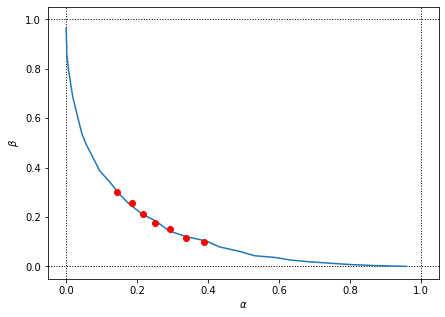

In [ ]:
plt.figure(figsize=(7,5))

plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$',rotation= 90 )
# plt.xlim(-0.1, 1.05)
# plt.ylim(-0.1, 1.05)
x = [0,1]
y = [0,1]

[plt.axvline(x = _x, linewidth=1, color='k', linestyle=':') for _x in x]
[plt.axhline(y = _y, linewidth=1, color='k', linestyle=':') for _y in y]
# figure_2_2 = plt.plot(alphas_simulated, betas_simulated, 'ro', alphas_simulated, betas_simulated, 'k-')
figure_2_2 = plt.plot(alphas, betas, alphas_target, betas_target, 'ro') 

# _4. If a simple random sample $X_1, X_2,\ldots,X_n$ has unknown finite variance $\sigma^2$, then, we can consider the sample variance
$$
S^2=\frac{1}{n}\sum_{i=1}^n(X_i-\bar{X})^2.
$$
Please derive the following result.
$$
ES^2=\frac{n-1}{n}\sigma^2.
$$

$$
ES^2=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2-(\bar{X}-μ)^2] =\frac{n-1}{n}\sigma^2.
$$


## Demonstration 
$$
ES^2=E[\frac{1}{n}\sum_{i=1}^n(X_i-\bar{X})^2]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n((X_i-μ)-(\bar{X}-μ))^2]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n((X_i-μ)^2-2(X_i-μ)(\bar{X}-μ) + (\bar{X}-μ)^2)]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2 -\frac{2}{n}(\bar{X}-μ) \sum_{i=1}^n(X_i-μ)+ \frac{1}{n}(\bar{X}-μ)^2\sum_{i=1}^n1]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2 -\frac{2}{n}(\bar{X}-μ) \sum_{i=1}^n(X_i-μ)+ (\bar{X}-μ)^2]
$$

 **Refer to [Demon 1] below for the next step**

$$
=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2 -\frac{2}{n}(\bar{X}-μ)\times n(\bar{X}-μ)+ (\bar{X}-μ)^2]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2 -2(\bar{X}-μ)^2+ (\bar{X}-μ)^2]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2-(\bar{X}-μ)^2]
$$

$$
=E[\frac{1}{n}\sum_{i=1}^n(X_i-μ)^2]-E[(\bar{X}-μ)^2]
$$

$$
=\sigma^2 - \frac{1}{n}\sigma^2
$$

$$
=\frac{n-1}{n}\sigma^2
$$


**[Demon 1]**
$$
\bar{X}-μ = \frac{1}{n}\sum_{i=1}^nX_i-μ
$$
$$
= \frac{1}{n}\sum_{i=1}^nX_i-\frac{1}{n}\sum_{i=1}^nμ
$$
$$
= \frac{1}{n}\sum_{i=1}^n(X_i-μ)
$$

- Conclusion 
$$
n(\bar{X}-μ) = \sum_{i=1}^n(X_i-μ)
$$